In [ ]:
Name - Dhangar Sumedh Dilip
Class - BE Artificial Intelligence & Data Science.
Roll No - 15
Title - Data Aggregation.
        Analyzing Sales Performance by Region in a Retail Company.

In [1]:
# Step No.1 - Import the Dataset.

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\dhangarsumedh\Downloads\Retail_Sales_Data (1).csv")

In [6]:
df.head()


,Transaction Date,Region,Product Category,Quantity Sold,Sales Amount,Customer Name,Transaction ID,Payment Method
0,2019-01-16,West,Home Decor,9,909.84,Melinda Pham,7b094307-bcd3-4f16-84a7-2bca783fff4f,Credit Card
1,2021-09-17,North,Clothing,8,900.29,Shelly Perez,fb437a2e-4ebf-4807-b84e-f2dfae83541a,Credit Card
2,2020-03-27,East,Electronics,3,506.07,Scott White,b6ead965-ed1c-4bdc-95ac-864685467abd,Online Banking
3,2019-02-11,South,Clothing,9,744.70,Gloria Williams,400773f4-a820-47b6-b3c4-2cc2a5467e73,Cash
4,2020-01-15,East,Books,4,245.55,Michael Sims,10b62e7a-38f8-4f27-a989-b99b55d76223,Cash


In [7]:
df.tail()

,Transaction Date,Region,Product Category,Quantity Sold,Sales Amount,Customer Name,Transaction ID,Payment Method
95,2020-06-26,East,Electronics,3,914.06,Erica Franklin DVM,56855833-4f68-4312-b5e0-88c7dc7ce72b,Online Banking
96,2021-07-04,South,Electronics,3,652.93,Ricky Walsh,7e03f607-9b90-4075-b05f-e704c81fb165,PayPal
97,2020-04-08,North,Books,9,640.88,Luis Wong,4f1f1533-6fb0-468d-80ac-a8c1db865b1a,Online Banking
98,2021-12-24,East,Electronics,1,727.21,Christopher Reese,0c3d09c3-469c-4b2f-860e-89365bab7f88,Online Banking
99,2020-10-04,South,Clothing,4,554.22,Barry Johnson,95921b52-e166-4d8f-86c6-2149cf1398d8,Credit Card


In [8]:
# Step No2. - Explore the Dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  100 non-null    object 
 1   Region            100 non-null    object 
 2   Product Category  100 non-null    object 
 3   Quantity Sold     100 non-null    int64  
 4   Sales Amount      100 non-null    float64
 5   Customer Name     100 non-null    object 
 6   Transaction ID    100 non-null    object 
 7   Payment Method    100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [13]:
df.describe()

,Quantity Sold,Sales Amount
count,100.000000,100.000000
mean,5.700000,544.873300
std,2.904194,276.530738
min,1.000000,23.140000
25%,3.000000,336.295000
50%,5.500000,554.715000
75%,8.000000,781.757500
max,10.000000,984.850000


In [14]:
df.shape

(100, 8)

In [15]:
df.columns

Index(['Transaction Date', 'Region', 'Product Category', 'Quantity Sold',
       'Sales Amount', 'Customer Name', 'Transaction ID', 'Payment Method'],
      dtype='object')

In [16]:
df.dtypes

Transaction Date     object
Region               object
Product Category     object
Quantity Sold         int64
Sales Amount        float64
Customer Name        object
Transaction ID       object
Payment Method       object
dtype: object

In [18]:
# Step No.3 - Identify relevant variables.

In [22]:
df['Region'].unique()



array(['West', 'North', 'East', 'South'], dtype=object)

In [23]:
df['Sales Amount'].describe()


count    100.000000
mean     544.873300
std      276.530738
min       23.140000
25%      336.295000
50%      554.715000
75%      781.757500
max      984.850000
Name: Sales Amount, dtype: float64

In [24]:
df['Product Category'].unique()

array(['Home Decor', 'Clothing', 'Electronics', 'Books'], dtype=object)

In [31]:
# Step No.4 - Group sales data by region and calculate total sales amount.

In [32]:
sales_by_region = df.groupby('Region')['Sales Amount'].sum().reset_index()
sales_by_region

,Region,Sales Amount
0,East,14382.28
1,North,13031.74
2,South,11300.33
3,West,15772.98


In [33]:
# Step No.5 - Create bar plots or pie charts to visualize the sales distribution by region.

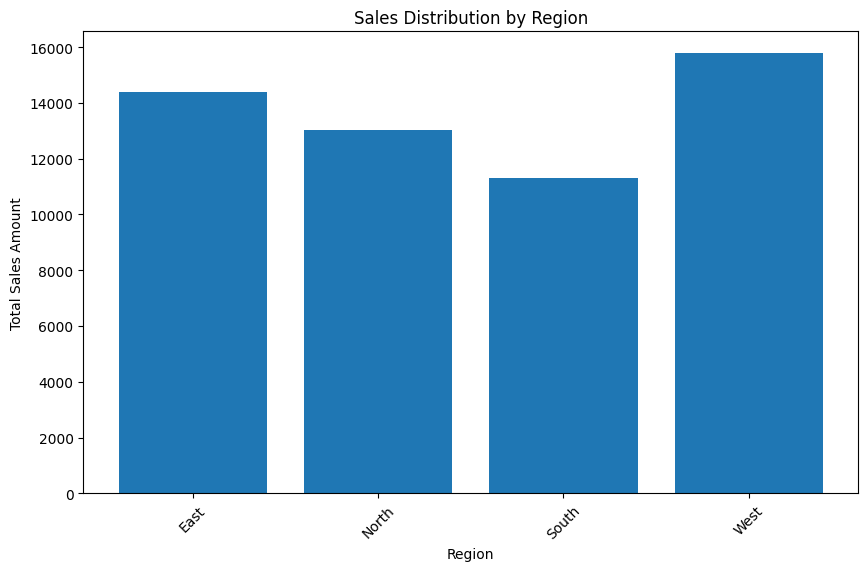

In [35]:
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales Amount'])
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.xticks(rotation=45)
plt.show()



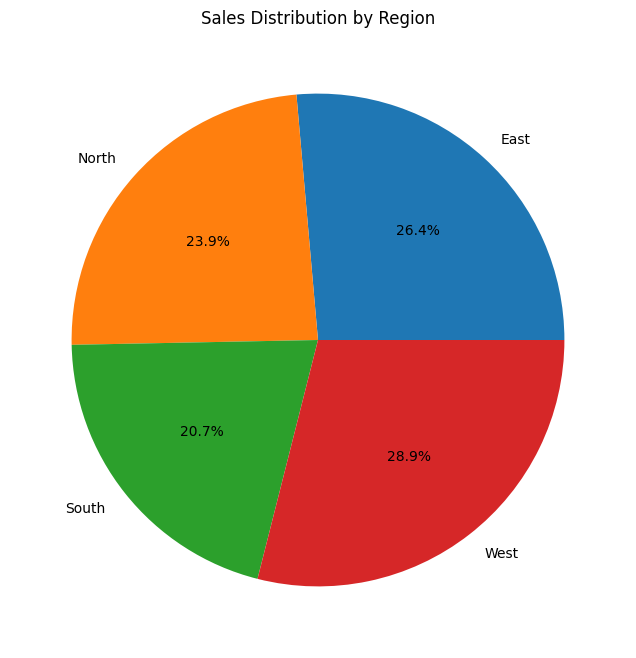

In [37]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales Amount'], labels=sales_by_region['Region'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()


In [38]:
# Step No.6 - Identify top-performing regions.

In [40]:
# Sort the regions by sales amount in descending order
top_regions = sales_by_region.sort_values(by='Sales Amount', ascending=False)
top_regions


,Region,Sales Amount
3,West,15772.98
0,East,14382.28
1,North,13031.74
2,South,11300.33


In [41]:
# Step No.7 - Group sales data by region and product category to calculate total sales amount for each combination.

In [43]:
sales_by_region_category = df.groupby(['Region', 'Product Category'])['Sales Amount'].sum().unstack().fillna(0)

In [44]:
sales_by_region_category 

Product Category,Books,Clothing,Electronics,Home Decor
Region,,,,
East,759.89,4293.54,6153.44,3175.41
North,2235.48,4121.55,3208.94,3465.77
South,573.38,4977.85,2581.59,3167.51
West,4907.12,3185.51,3043.47,4636.88


In [45]:
# Step No.8 - Create stacked bar plots or grouped bar plots.

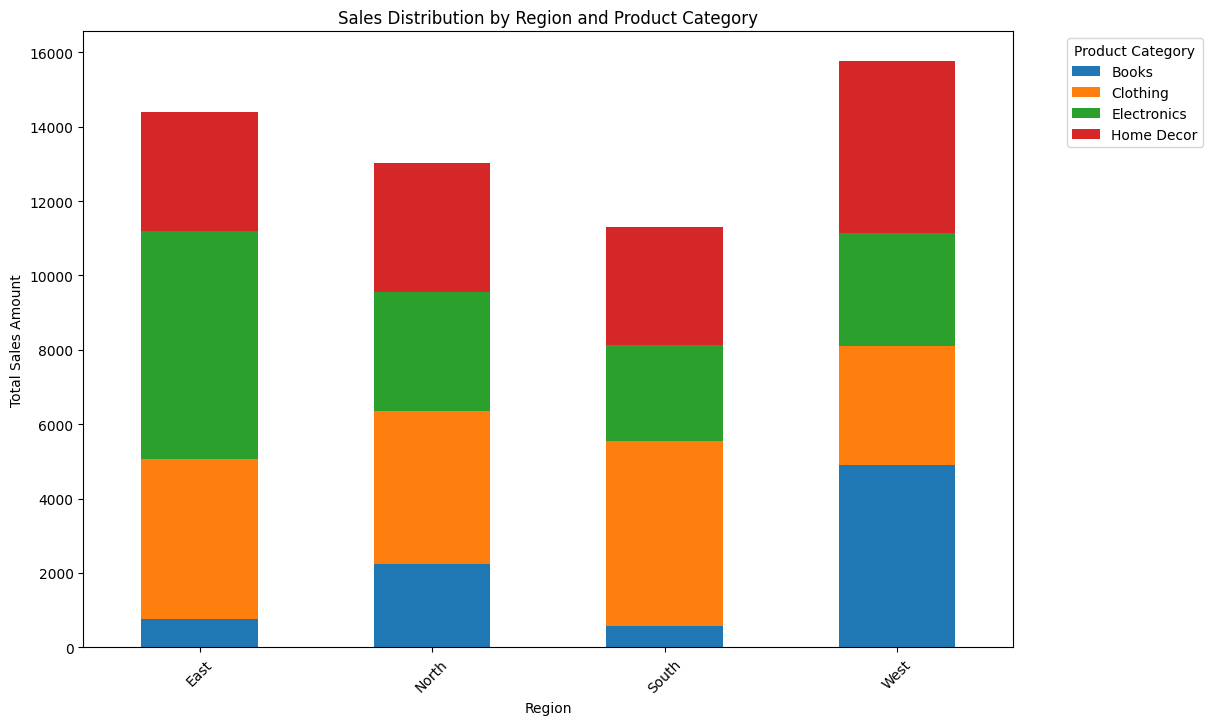

In [46]:
# Stacked bar plot
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region and Product Category')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

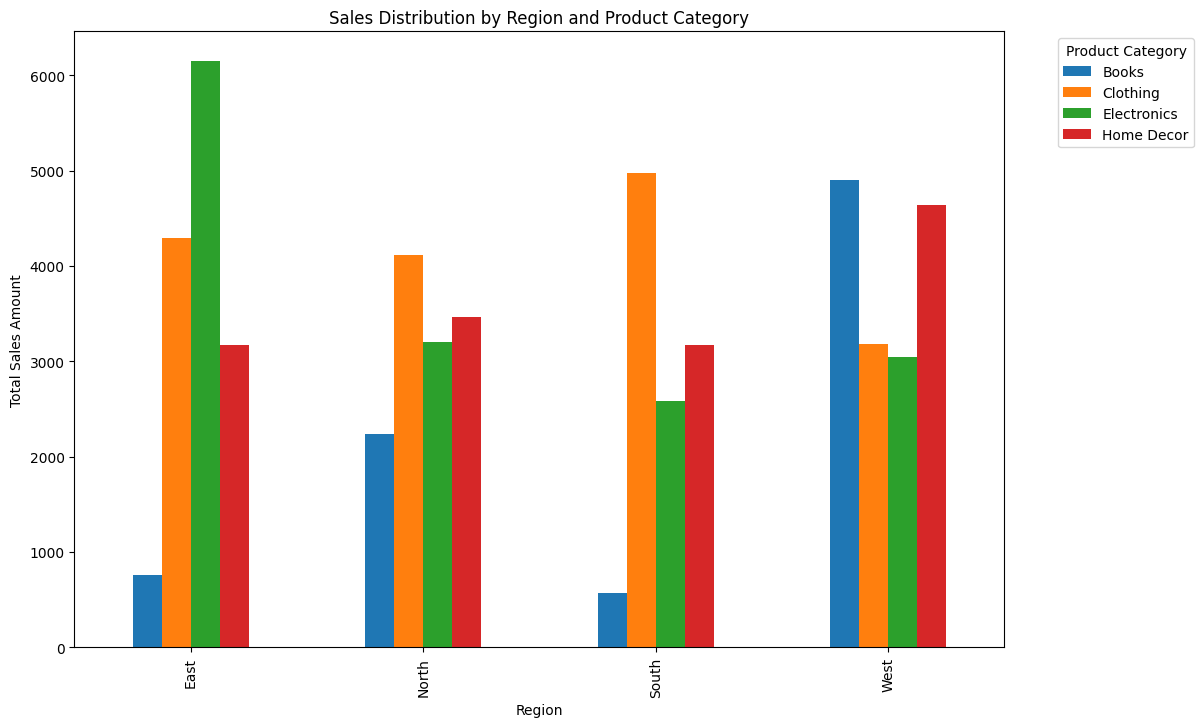

In [47]:
# Grouped bar plot
sales_by_region_category.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region and Product Category')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')